***
    
Demo EvoJAX for PINN (Physics-Informed Neural Network)
    
***

    Version: 2023-03-16
    
    Author : Nicholas Sung Wei Yong, Wong Jian Cheng, Ooi Chin Chun, Abhishek Gupta

    Contain:
    
    1. PINN for solving Non-linear Burgers equation 
    
    2. Optimize PINN using CMA-ES solver in the EvoJAX framework
       -  as described in Nicholas Sung Wei Yong, Jian Cheng Wong, Pao-Hsiung Chiu, Abhishek Gupta, Chinchun Ooi, Yew-Soon Ong
       "Neuroevolution Surpasses Stochastic Gradient Descent for Physics-Informed Neural Networks" arXiv preprint arXiv:2212.07624 (2022).

# Demo

In [1]:
# choose GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# import library
import numpy as np
import time

# import problem
from nonlinear import get_fitness, policy # Number of parameters: 260

CMA Solver

In [2]:
from evojax.algo import CMA_ES_JAX

seed = 0
solver = CMA_ES_JAX(
         pop_size=100, init_stdev=0.01,
         param_size=policy.num_params, seed=seed)

Training

In [3]:
max_iters = 100000
num_tests = 1

loss_ls = []
t_training = []

runtime = 0
train_iters = 0
while (train_iters < max_iters) and (runtime < 60):
    start = time.time()
    # Training.
    params = solver.ask()
    scores = get_fitness(params)
    # Updates the weights through the solver
    solver.tell(fitness=scores)
    # This is the average loss of all the population of parameters
    score_avg_loss = np.mean(np.array(scores, copy=False, subok=True))
    best_params = solver.best_params
    end = time.time()
    t_training.append(end-start)
    loss_ls.append(-1*score_avg_loss)
    # update
    runtime += (end-start)
    train_iters += 1
    # print out
    print ('time = %.2fs  loss = %.2e'%(runtime, loss_ls[-1]))

time = 3.39s  loss = 1.55e-01
time = 4.45s  loss = 1.55e-01
time = 4.46s  loss = 1.55e-01
time = 4.48s  loss = 1.55e-01
time = 4.49s  loss = 1.55e-01
time = 4.51s  loss = 1.55e-01
time = 4.52s  loss = 1.55e-01
time = 4.53s  loss = 1.55e-01
time = 4.55s  loss = 1.54e-01
time = 4.56s  loss = 1.54e-01
time = 4.58s  loss = 1.53e-01
time = 4.59s  loss = 1.53e-01
time = 4.60s  loss = 1.52e-01
time = 4.62s  loss = 1.51e-01
time = 4.63s  loss = 1.50e-01
time = 4.64s  loss = 1.49e-01
time = 4.65s  loss = 1.47e-01
time = 4.67s  loss = 1.45e-01
time = 4.68s  loss = 1.43e-01
time = 4.69s  loss = 1.41e-01
time = 4.71s  loss = 1.37e-01
time = 4.72s  loss = 1.33e-01
time = 4.73s  loss = 1.28e-01
time = 4.75s  loss = 1.24e-01
time = 4.76s  loss = 1.17e-01
time = 4.77s  loss = 1.13e-01
time = 4.79s  loss = 1.09e-01
time = 4.80s  loss = 1.09e-01
time = 4.81s  loss = 1.10e-01
time = 4.83s  loss = 1.11e-01
time = 4.84s  loss = 1.11e-01
time = 4.85s  loss = 1.12e-01
time = 4.87s  loss = 1.13e-01
time = 4.8

time = 8.22s  loss = 7.48e-02
time = 8.23s  loss = 6.58e-02
time = 8.24s  loss = 6.66e-02
time = 8.26s  loss = 8.50e-02
time = 8.27s  loss = 6.70e-02
time = 8.28s  loss = 8.05e-02
time = 8.30s  loss = 7.59e-02
time = 8.31s  loss = 7.81e-02
time = 8.32s  loss = 7.96e-02
time = 8.34s  loss = 6.86e-02
time = 8.35s  loss = 7.32e-02
time = 8.36s  loss = 7.39e-02
time = 8.38s  loss = 6.47e-02
time = 8.39s  loss = 6.66e-02
time = 8.40s  loss = 5.92e-02
time = 8.42s  loss = 6.03e-02
time = 8.43s  loss = 6.40e-02
time = 8.45s  loss = 6.06e-02
time = 8.46s  loss = 6.45e-02
time = 8.47s  loss = 7.02e-02
time = 8.48s  loss = 7.16e-02
time = 8.50s  loss = 5.49e-02
time = 8.51s  loss = 6.36e-02
time = 8.53s  loss = 5.91e-02
time = 8.54s  loss = 6.82e-02
time = 8.55s  loss = 7.92e-02
time = 8.57s  loss = 7.34e-02
time = 8.58s  loss = 7.32e-02
time = 8.59s  loss = 6.36e-02
time = 8.61s  loss = 6.16e-02
time = 8.62s  loss = 6.65e-02
time = 8.63s  loss = 5.66e-02
time = 8.64s  loss = 6.07e-02
time = 8.6

time = 11.78s  loss = 1.58e-02
time = 11.79s  loss = 1.65e-02
time = 11.80s  loss = 1.66e-02
time = 11.82s  loss = 1.64e-02
time = 11.83s  loss = 1.67e-02
time = 11.84s  loss = 1.75e-02
time = 11.86s  loss = 1.69e-02
time = 11.87s  loss = 1.64e-02
time = 11.88s  loss = 1.73e-02
time = 11.90s  loss = 1.60e-02
time = 11.91s  loss = 1.63e-02
time = 11.92s  loss = 1.52e-02
time = 11.94s  loss = 1.71e-02
time = 11.95s  loss = 1.58e-02
time = 11.97s  loss = 1.69e-02
time = 11.98s  loss = 1.61e-02
time = 11.99s  loss = 1.73e-02
time = 12.01s  loss = 1.62e-02
time = 12.02s  loss = 1.69e-02
time = 12.03s  loss = 1.64e-02
time = 12.05s  loss = 1.73e-02
time = 12.06s  loss = 1.64e-02
time = 12.07s  loss = 1.67e-02
time = 12.09s  loss = 1.75e-02
time = 12.10s  loss = 1.70e-02
time = 12.11s  loss = 1.88e-02
time = 12.12s  loss = 1.65e-02
time = 12.14s  loss = 1.55e-02
time = 12.15s  loss = 2.01e-02
time = 12.16s  loss = 1.71e-02
time = 12.18s  loss = 1.86e-02
time = 12.19s  loss = 1.67e-02
time = 1

time = 15.33s  loss = 8.29e-03
time = 15.35s  loss = 8.29e-03
time = 15.36s  loss = 8.08e-03
time = 15.37s  loss = 8.11e-03
time = 15.39s  loss = 7.96e-03
time = 15.40s  loss = 7.92e-03
time = 15.41s  loss = 8.10e-03
time = 15.42s  loss = 7.93e-03
time = 15.44s  loss = 7.89e-03
time = 15.45s  loss = 7.82e-03
time = 15.46s  loss = 7.87e-03
time = 15.48s  loss = 7.70e-03
time = 15.49s  loss = 7.98e-03
time = 15.50s  loss = 7.83e-03
time = 15.52s  loss = 7.99e-03
time = 15.53s  loss = 7.99e-03
time = 15.54s  loss = 7.87e-03
time = 15.56s  loss = 7.92e-03
time = 15.57s  loss = 8.07e-03
time = 15.58s  loss = 7.89e-03
time = 15.59s  loss = 7.89e-03
time = 15.61s  loss = 7.79e-03
time = 15.62s  loss = 7.85e-03
time = 15.63s  loss = 8.01e-03
time = 15.65s  loss = 7.81e-03
time = 15.66s  loss = 7.68e-03
time = 15.67s  loss = 7.82e-03
time = 15.69s  loss = 7.88e-03
time = 15.70s  loss = 7.92e-03
time = 15.71s  loss = 7.80e-03
time = 15.72s  loss = 7.87e-03
time = 15.74s  loss = 7.91e-03
time = 1

time = 18.89s  loss = 6.27e-03
time = 18.91s  loss = 6.24e-03
time = 18.92s  loss = 6.27e-03
time = 18.93s  loss = 6.26e-03
time = 18.95s  loss = 6.26e-03
time = 18.96s  loss = 6.24e-03
time = 18.97s  loss = 6.27e-03
time = 18.99s  loss = 6.27e-03
time = 19.00s  loss = 6.27e-03
time = 19.01s  loss = 6.29e-03
time = 19.02s  loss = 6.25e-03
time = 19.04s  loss = 6.25e-03
time = 19.05s  loss = 6.26e-03
time = 19.06s  loss = 6.26e-03
time = 19.08s  loss = 6.26e-03
time = 19.09s  loss = 6.28e-03
time = 19.10s  loss = 6.26e-03
time = 19.12s  loss = 6.27e-03
time = 19.13s  loss = 6.28e-03
time = 19.14s  loss = 6.27e-03
time = 19.16s  loss = 6.27e-03
time = 19.17s  loss = 6.26e-03
time = 19.18s  loss = 6.24e-03
time = 19.20s  loss = 6.26e-03
time = 19.21s  loss = 6.23e-03
time = 19.22s  loss = 6.28e-03
time = 19.24s  loss = 6.26e-03
time = 19.25s  loss = 6.26e-03
time = 19.26s  loss = 6.27e-03
time = 19.27s  loss = 6.24e-03
time = 19.29s  loss = 6.26e-03
time = 19.30s  loss = 6.25e-03
time = 1

time = 22.45s  loss = 5.90e-03
time = 22.47s  loss = 5.90e-03
time = 22.48s  loss = 5.93e-03
time = 22.49s  loss = 5.91e-03
time = 22.51s  loss = 5.93e-03
time = 22.52s  loss = 5.92e-03
time = 22.53s  loss = 5.94e-03
time = 22.55s  loss = 5.97e-03
time = 22.56s  loss = 5.94e-03
time = 22.57s  loss = 5.95e-03
time = 22.59s  loss = 5.93e-03
time = 22.60s  loss = 5.96e-03
time = 22.61s  loss = 5.98e-03
time = 22.62s  loss = 5.97e-03
time = 22.64s  loss = 5.93e-03
time = 22.65s  loss = 5.96e-03
time = 22.66s  loss = 5.94e-03
time = 22.68s  loss = 5.96e-03
time = 22.69s  loss = 5.96e-03
time = 22.70s  loss = 5.96e-03
time = 22.72s  loss = 5.93e-03
time = 22.73s  loss = 5.93e-03
time = 22.74s  loss = 5.92e-03
time = 22.76s  loss = 5.93e-03
time = 22.77s  loss = 5.90e-03
time = 22.78s  loss = 5.92e-03
time = 22.79s  loss = 5.93e-03
time = 22.81s  loss = 5.94e-03
time = 22.82s  loss = 5.91e-03
time = 22.83s  loss = 5.92e-03
time = 22.85s  loss = 5.91e-03
time = 22.86s  loss = 5.92e-03
time = 2

time = 26.00s  loss = 5.40e-03
time = 26.01s  loss = 5.41e-03
time = 26.02s  loss = 5.41e-03
time = 26.04s  loss = 5.40e-03
time = 26.05s  loss = 5.40e-03
time = 26.06s  loss = 5.40e-03
time = 26.08s  loss = 5.40e-03
time = 26.09s  loss = 5.40e-03
time = 26.10s  loss = 5.40e-03
time = 26.12s  loss = 5.41e-03
time = 26.13s  loss = 5.40e-03
time = 26.14s  loss = 5.41e-03
time = 26.16s  loss = 5.39e-03
time = 26.17s  loss = 5.40e-03
time = 26.18s  loss = 5.40e-03
time = 26.20s  loss = 5.38e-03
time = 26.21s  loss = 5.40e-03
time = 26.22s  loss = 5.39e-03
time = 26.24s  loss = 5.39e-03
time = 26.25s  loss = 5.39e-03
time = 26.26s  loss = 5.40e-03
time = 26.28s  loss = 5.40e-03
time = 26.29s  loss = 5.40e-03
time = 26.30s  loss = 5.40e-03
time = 26.31s  loss = 5.39e-03
time = 26.33s  loss = 5.40e-03
time = 26.34s  loss = 5.39e-03
time = 26.35s  loss = 5.39e-03
time = 26.37s  loss = 5.39e-03
time = 26.38s  loss = 5.40e-03
time = 26.39s  loss = 5.39e-03
time = 26.41s  loss = 5.39e-03
time = 2

time = 29.55s  loss = 5.11e-03
time = 29.56s  loss = 5.10e-03
time = 29.58s  loss = 5.10e-03
time = 29.59s  loss = 5.09e-03
time = 29.60s  loss = 5.09e-03
time = 29.62s  loss = 5.08e-03
time = 29.63s  loss = 5.08e-03
time = 29.64s  loss = 5.08e-03
time = 29.66s  loss = 5.09e-03
time = 29.67s  loss = 5.07e-03
time = 29.68s  loss = 5.06e-03
time = 29.70s  loss = 5.06e-03
time = 29.71s  loss = 5.06e-03
time = 29.72s  loss = 5.08e-03
time = 29.74s  loss = 5.06e-03
time = 29.75s  loss = 5.08e-03
time = 29.76s  loss = 5.05e-03
time = 29.78s  loss = 5.06e-03
time = 29.79s  loss = 5.08e-03
time = 29.80s  loss = 5.06e-03
time = 29.82s  loss = 5.06e-03
time = 29.83s  loss = 5.07e-03
time = 29.84s  loss = 5.05e-03
time = 29.86s  loss = 5.05e-03
time = 29.87s  loss = 5.05e-03
time = 29.88s  loss = 5.04e-03
time = 29.90s  loss = 5.04e-03
time = 29.91s  loss = 5.04e-03
time = 29.92s  loss = 5.04e-03
time = 29.94s  loss = 5.05e-03
time = 29.95s  loss = 5.04e-03
time = 29.96s  loss = 5.03e-03
time = 2

time = 33.12s  loss = 4.66e-03
time = 33.13s  loss = 4.65e-03
time = 33.14s  loss = 4.64e-03
time = 33.16s  loss = 4.64e-03
time = 33.17s  loss = 4.65e-03
time = 33.18s  loss = 4.62e-03
time = 33.20s  loss = 4.63e-03
time = 33.21s  loss = 4.63e-03
time = 33.22s  loss = 4.63e-03
time = 33.23s  loss = 4.64e-03
time = 33.25s  loss = 4.62e-03
time = 33.26s  loss = 4.61e-03
time = 33.27s  loss = 4.63e-03
time = 33.29s  loss = 4.62e-03
time = 33.30s  loss = 4.62e-03
time = 33.32s  loss = 4.60e-03
time = 33.33s  loss = 4.62e-03
time = 33.34s  loss = 4.61e-03
time = 33.36s  loss = 4.62e-03
time = 33.37s  loss = 4.62e-03
time = 33.38s  loss = 4.62e-03
time = 33.40s  loss = 4.62e-03
time = 33.41s  loss = 4.62e-03
time = 33.42s  loss = 4.63e-03
time = 33.43s  loss = 4.62e-03
time = 33.45s  loss = 4.62e-03
time = 33.46s  loss = 4.60e-03
time = 33.47s  loss = 4.62e-03
time = 33.49s  loss = 4.62e-03
time = 33.50s  loss = 4.59e-03
time = 33.51s  loss = 4.64e-03
time = 33.53s  loss = 4.61e-03
time = 3

time = 36.66s  loss = 3.88e-03
time = 36.68s  loss = 3.89e-03
time = 36.69s  loss = 3.91e-03
time = 36.70s  loss = 3.94e-03
time = 36.72s  loss = 3.88e-03
time = 36.73s  loss = 3.93e-03
time = 36.74s  loss = 3.94e-03
time = 36.75s  loss = 3.93e-03
time = 36.77s  loss = 3.95e-03
time = 36.78s  loss = 3.91e-03
time = 36.79s  loss = 3.94e-03
time = 36.81s  loss = 3.95e-03
time = 36.82s  loss = 3.95e-03
time = 36.83s  loss = 3.91e-03
time = 36.85s  loss = 3.95e-03
time = 36.86s  loss = 3.90e-03
time = 36.87s  loss = 3.87e-03
time = 36.89s  loss = 3.94e-03
time = 36.90s  loss = 3.91e-03
time = 36.91s  loss = 3.90e-03
time = 36.93s  loss = 3.90e-03
time = 36.94s  loss = 3.90e-03
time = 36.95s  loss = 3.85e-03
time = 36.97s  loss = 3.87e-03
time = 36.98s  loss = 3.87e-03
time = 36.99s  loss = 3.94e-03
time = 37.01s  loss = 3.89e-03
time = 37.02s  loss = 3.91e-03
time = 37.03s  loss = 3.89e-03
time = 37.05s  loss = 3.88e-03
time = 37.06s  loss = 3.93e-03
time = 37.07s  loss = 3.94e-03
time = 3

time = 40.21s  loss = 3.29e-03
time = 40.22s  loss = 3.29e-03
time = 40.24s  loss = 3.27e-03
time = 40.25s  loss = 3.27e-03
time = 40.26s  loss = 3.28e-03
time = 40.28s  loss = 3.26e-03
time = 40.29s  loss = 3.21e-03
time = 40.30s  loss = 3.26e-03
time = 40.32s  loss = 3.27e-03
time = 40.33s  loss = 3.26e-03
time = 40.35s  loss = 3.26e-03
time = 40.36s  loss = 3.28e-03
time = 40.37s  loss = 3.27e-03
time = 40.39s  loss = 3.26e-03
time = 40.40s  loss = 3.26e-03
time = 40.41s  loss = 3.28e-03
time = 40.43s  loss = 3.24e-03
time = 40.44s  loss = 3.26e-03
time = 40.45s  loss = 3.28e-03
time = 40.47s  loss = 3.27e-03
time = 40.48s  loss = 3.28e-03
time = 40.49s  loss = 3.24e-03
time = 40.51s  loss = 3.25e-03
time = 40.52s  loss = 3.27e-03
time = 40.53s  loss = 3.30e-03
time = 40.55s  loss = 3.27e-03
time = 40.56s  loss = 3.27e-03
time = 40.57s  loss = 3.27e-03
time = 40.59s  loss = 3.24e-03
time = 40.60s  loss = 3.28e-03
time = 40.61s  loss = 3.30e-03
time = 40.63s  loss = 3.27e-03
time = 4

time = 43.77s  loss = 2.61e-03
time = 43.78s  loss = 2.62e-03
time = 43.80s  loss = 2.60e-03
time = 43.81s  loss = 2.60e-03
time = 43.82s  loss = 2.60e-03
time = 43.83s  loss = 2.60e-03
time = 43.85s  loss = 2.61e-03
time = 43.86s  loss = 2.61e-03
time = 43.87s  loss = 2.61e-03
time = 43.89s  loss = 2.60e-03
time = 43.90s  loss = 2.59e-03
time = 43.91s  loss = 2.58e-03
time = 43.93s  loss = 2.58e-03
time = 43.94s  loss = 2.55e-03
time = 43.95s  loss = 2.57e-03
time = 43.97s  loss = 2.58e-03
time = 43.98s  loss = 2.59e-03
time = 43.99s  loss = 2.58e-03
time = 44.00s  loss = 2.58e-03
time = 44.02s  loss = 2.58e-03
time = 44.03s  loss = 2.57e-03
time = 44.05s  loss = 2.59e-03
time = 44.06s  loss = 2.59e-03
time = 44.07s  loss = 2.58e-03
time = 44.09s  loss = 2.59e-03
time = 44.10s  loss = 2.61e-03
time = 44.11s  loss = 2.61e-03
time = 44.13s  loss = 2.62e-03
time = 44.14s  loss = 2.63e-03
time = 44.15s  loss = 2.59e-03
time = 44.17s  loss = 2.61e-03
time = 44.18s  loss = 2.58e-03
time = 4

time = 47.34s  loss = 2.03e-03
time = 47.35s  loss = 2.04e-03
time = 47.36s  loss = 2.02e-03
time = 47.38s  loss = 2.01e-03
time = 47.39s  loss = 2.01e-03
time = 47.40s  loss = 2.04e-03
time = 47.42s  loss = 2.04e-03
time = 47.43s  loss = 2.05e-03
time = 47.44s  loss = 2.03e-03
time = 47.46s  loss = 2.01e-03
time = 47.47s  loss = 2.00e-03
time = 47.48s  loss = 2.02e-03
time = 47.50s  loss = 2.01e-03
time = 47.51s  loss = 2.03e-03
time = 47.52s  loss = 2.00e-03
time = 47.53s  loss = 2.01e-03
time = 47.55s  loss = 2.03e-03
time = 47.56s  loss = 2.03e-03
time = 47.57s  loss = 2.02e-03
time = 47.59s  loss = 2.02e-03
time = 47.60s  loss = 2.04e-03
time = 47.61s  loss = 2.03e-03
time = 47.63s  loss = 2.02e-03
time = 47.64s  loss = 2.03e-03
time = 47.65s  loss = 2.05e-03
time = 47.67s  loss = 2.01e-03
time = 47.68s  loss = 2.03e-03
time = 47.69s  loss = 2.04e-03
time = 47.71s  loss = 2.02e-03
time = 47.72s  loss = 1.99e-03
time = 47.73s  loss = 2.00e-03
time = 47.75s  loss = 1.99e-03
time = 4

time = 50.90s  loss = 1.50e-03
time = 50.91s  loss = 1.50e-03
time = 50.93s  loss = 1.50e-03
time = 50.94s  loss = 1.49e-03
time = 50.95s  loss = 1.49e-03
time = 50.96s  loss = 1.52e-03
time = 50.98s  loss = 1.51e-03
time = 50.99s  loss = 1.52e-03
time = 51.00s  loss = 1.53e-03
time = 51.02s  loss = 1.49e-03
time = 51.03s  loss = 1.48e-03
time = 51.04s  loss = 1.48e-03
time = 51.06s  loss = 1.48e-03
time = 51.07s  loss = 1.47e-03
time = 51.08s  loss = 1.48e-03
time = 51.10s  loss = 1.49e-03
time = 51.11s  loss = 1.46e-03
time = 51.12s  loss = 1.46e-03
time = 51.14s  loss = 1.45e-03
time = 51.15s  loss = 1.48e-03
time = 51.16s  loss = 1.48e-03
time = 51.17s  loss = 1.47e-03
time = 51.19s  loss = 1.48e-03
time = 51.20s  loss = 1.44e-03
time = 51.21s  loss = 1.44e-03
time = 51.23s  loss = 1.47e-03
time = 51.24s  loss = 1.45e-03
time = 51.25s  loss = 1.45e-03
time = 51.27s  loss = 1.42e-03
time = 51.28s  loss = 1.43e-03
time = 51.29s  loss = 1.45e-03
time = 51.31s  loss = 1.44e-03
time = 5

time = 54.46s  loss = 1.08e-03
time = 54.48s  loss = 1.09e-03
time = 54.49s  loss = 1.08e-03
time = 54.50s  loss = 1.09e-03
time = 54.52s  loss = 1.08e-03
time = 54.53s  loss = 1.08e-03
time = 54.54s  loss = 1.08e-03
time = 54.56s  loss = 1.08e-03
time = 54.57s  loss = 1.08e-03
time = 54.58s  loss = 1.08e-03
time = 54.60s  loss = 1.08e-03
time = 54.61s  loss = 1.08e-03
time = 54.62s  loss = 1.07e-03
time = 54.63s  loss = 1.08e-03
time = 54.65s  loss = 1.08e-03
time = 54.66s  loss = 1.08e-03
time = 54.67s  loss = 1.08e-03
time = 54.69s  loss = 1.08e-03
time = 54.70s  loss = 1.07e-03
time = 54.72s  loss = 1.08e-03
time = 54.73s  loss = 1.08e-03
time = 54.74s  loss = 1.07e-03
time = 54.76s  loss = 1.07e-03
time = 54.77s  loss = 1.07e-03
time = 54.78s  loss = 1.06e-03
time = 54.80s  loss = 1.06e-03
time = 54.81s  loss = 1.07e-03
time = 54.82s  loss = 1.07e-03
time = 54.83s  loss = 1.07e-03
time = 54.85s  loss = 1.07e-03
time = 54.86s  loss = 1.05e-03
time = 54.87s  loss = 1.05e-03
time = 5

time = 58.02s  loss = 8.81e-04
time = 58.03s  loss = 8.84e-04
time = 58.05s  loss = 8.81e-04
time = 58.06s  loss = 8.86e-04
time = 58.07s  loss = 8.82e-04
time = 58.09s  loss = 8.81e-04
time = 58.10s  loss = 8.81e-04
time = 58.11s  loss = 8.83e-04
time = 58.13s  loss = 8.76e-04
time = 58.14s  loss = 8.77e-04
time = 58.15s  loss = 8.77e-04
time = 58.17s  loss = 8.78e-04
time = 58.18s  loss = 8.73e-04
time = 58.19s  loss = 8.75e-04
time = 58.20s  loss = 8.73e-04
time = 58.22s  loss = 8.76e-04
time = 58.23s  loss = 8.76e-04
time = 58.24s  loss = 8.75e-04
time = 58.26s  loss = 8.75e-04
time = 58.27s  loss = 8.72e-04
time = 58.28s  loss = 8.71e-04
time = 58.30s  loss = 8.73e-04
time = 58.31s  loss = 8.68e-04
time = 58.32s  loss = 8.69e-04
time = 58.34s  loss = 8.64e-04
time = 58.35s  loss = 8.68e-04
time = 58.36s  loss = 8.66e-04
time = 58.37s  loss = 8.65e-04
time = 58.39s  loss = 8.66e-04
time = 58.40s  loss = 8.65e-04
time = 58.41s  loss = 8.63e-04
time = 58.43s  loss = 8.62e-04
time = 5

In [4]:
train_iters, loss_ls[-1], min(loss_ls)

(4224, 0.0007792506366968155, 0.0007776237325742841)

In [5]:
# import pandas as pd
# training_ls = np.cumsum(t_training)
# df = pd.DataFrame({'Training Time': training_ls, 'Loss': loss_ls})
# df.to_csv('nonlinear_cma_%d.csv'%(seed), index=False)

Visualize optimzied PINN

In [6]:
from nonlinear import PINNs
from flax.core.frozen_dict import unfreeze, freeze
from jax import random, numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
this_dict = policy._format_params_fn(jnp.array([best_params]))
new_dict = unfreeze(this_dict)
for key1, value1 in new_dict.items():
    for key2, value2 in value1.items():
        for key3, value3 in value2.items():
            new_dict[key1][key2][key3] = value3[0]
new_dict = freeze(new_dict)

In [8]:
# Read data
sim = pd.read_csv('nonlinear.csv')
batch_X = np.vstack([sim.x.values, sim.t.values]).T
batch_y = sim[['u']].values
# PINN prediction
hello = PINNs()
prediction = hello.apply(new_dict, batch_X)
u = prediction[:,0:1]

DeviceArray(0.00057677, dtype=float32)

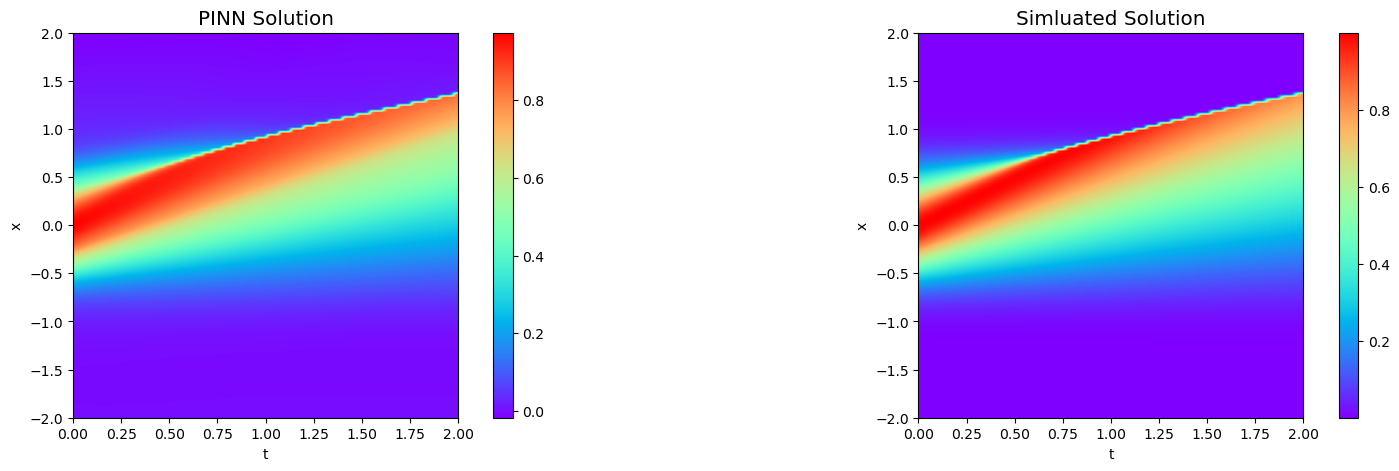

In [9]:
# plot & mse
fig = plt.figure(figsize=(20, 5))
u_viz = (u.reshape(201, 129)).T 
ext = [0 ,2, -2.0, 2.0]     # plot boundary  
ax1 = fig.add_subplot(1,2,1)
mesh =ax1.imshow(u_viz, interpolation='bilinear', origin='lower', cmap='rainbow', extent=ext, aspect=.5); 
plt.colorbar(mesh) 
plt.xlabel('t'); plt.ylabel('x'); 
plt.title('PINN Solution', fontsize='x-large'); 

u_true = (batch_y.reshape(201, 129)).T 
ext = [0 ,2, -2.0, 2.0]     # plot boundary    
ax2 = fig.add_subplot(1,2,2)
mesh2 = ax2.imshow(u_true, interpolation='bilinear', origin='lower', cmap='rainbow', extent=ext, aspect=.5); 
plt.colorbar(mesh2); 
plt.xlabel('t'); plt.ylabel('x'); 
plt.title('Simluated Solution', fontsize='x-large'); 

jnp.mean((u_viz - u_true)**2)

Write PINN prediction & ground truth to file

In [10]:
#np.save('nonlinear_cma_60s', (u_viz, u_true))